In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sb
%matplotlib inline

In [2]:
data = pd.read_csv('churn_analysis.csv')

### Дано
* state — штат США
* account_length — длительность использования аккаунта
* area_code — деление пользователей на псевдорегионы, использующееся в телекоме
* intl_plan — подключена ли у пользователя услуга международного общения
* vmail_plan — подключена ли у пользователя услуга голосовых сообщений
* vmail_message — количество голосых сообщений, который пользователь отправил / принял
* day_calls — сколько пользователь совершил дневных звонков
* day_mins — сколько пользователь проговорил минут в течение дня
* day_charge — сколько пользователь заплатил за свою дневную активность
* eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
* night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
* intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
* custserv_calls — сколько раз пользователь позвонил в службу поддержки
* treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
* mes_estim — оценка интенсивности пользования интернет мессенджерами
* churn — результат оттока: перестал ли абонент пользоваться услугами оператора

In [3]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


### 1 Вопрос

In [4]:
from scipy import stats

In [5]:
data_tr1 = data[data.treatment == 1]
states = np.unique(data.state)

In [6]:
p_vals = []
for i in range(np.unique(data.state).shape[0] - 1):
    for j in range(i + 1,np.unique(data.state).shape[0]):
        arr = [[np.sum(data_tr1[data_tr1.state == states[i]].churn == 'False.'),
                np.sum(data_tr1[data_tr1.state == states[i]].churn == 'True.')],
               [np.sum(data_tr1[data_tr1.state == states[j]].churn == 'False.'),
                np.sum(data_tr1[data_tr1.state == states[j]].churn == 'True.')]]
        #print np.array(arr)
        __,p,__,__ = stats.chi2_contingency(np.array(arr),correction=False)
        p_vals.append(p)

In [7]:
p_vals = np.array(p_vals)

In [8]:
print 'Кол-во уровней меньше 0.05: ', np.sum(p_vals < 0.05) # Ответ 1

Кол-во уровней меньше 0.05:  34


###  2 вопрос

In [9]:
p_vals_cor = []
for i in range(np.unique(data.state).shape[0] - 1):
    for j in range(i + 1,np.unique(data.state).shape[0]):
        arr = [[np.sum(data_tr1[data_tr1.state == states[i]].churn == 'False.'),
                np.sum(data_tr1[data_tr1.state == states[i]].churn == 'True.')],
               [np.sum(data_tr1[data_tr1.state == states[j]].churn == 'False.'),
                np.sum(data_tr1[data_tr1.state == states[j]].churn == 'True.')]]
        #print np.array(arr)
        __,p,__,__ = stats.chi2_contingency(np.array(arr),correction=True)
        p_vals_cor.append(p)

In [10]:
p_vals_cor = np.array(p_vals_cor)

In [11]:
print 'Кол-во уровней меньше 0.05 с коррекцией Йетца: ', np.sum(p_vals_cor < 0.05) # Ответ 2

Кол-во уровней меньше 0.05 с коррекцией Йетца:  0


In [12]:
for i in range(p_vals_cor.size):
    print '%.3f %.3f: %.5f'% (p_vals_cor[i],p_vals[i], (p_vals_cor[i] - p_vals[i]))

0.424 0.214: 0.21038
0.099 0.036: 0.06321
0.963 0.517: 0.44572
0.080 0.028: 0.05275
0.231 0.101: 0.12975
0.424 0.214: 0.21038
0.491 0.970: -0.47945
0.541 0.906: -0.36474
1.000 0.548: 0.45169
0.965 0.578: 0.38677
0.667 0.751: -0.08414
0.794 0.383: 0.41027
0.924 0.485: 0.43875
0.706 0.706: 0.00000
0.704 0.365: 0.33929
0.107 0.045: 0.06182
0.491 0.243: 0.24723
0.884 0.380: 0.50399
0.094 0.038: 0.05504
0.279 0.128: 0.15138
0.091 0.039: 0.05233
0.231 0.101: 0.12975
0.965 0.578: 0.38677
0.370 0.169: 0.20049
0.461 0.225: 0.23633
0.520 0.262: 0.25763
0.560 0.267: 0.29353
0.738 0.389: 0.34869
0.738 0.389: 0.34869
0.639 0.273: 0.36550
0.461 0.225: 0.23633
0.738 0.785: -0.04713
0.164 0.071: 0.09296
0.339 0.169: 0.16990
0.870 0.662: 0.20763
0.693 0.311: 0.38274
0.635 0.317: 0.31817
0.277 0.117: 0.15993
0.401 0.188: 0.21297
0.207 0.089: 0.11869
0.704 0.365: 0.33929
0.706 0.706: 0.00000
0.096 0.037: 0.05854
0.401 0.188: 0.21297
0.704 0.365: 0.33929
0.255 0.114: 0.14066
0.081 0.033: 0.04846
0.870 0.6

### 4 вопрос

In [13]:
p_vals_fisher = []
for i in range(np.unique(data.state).shape[0] - 1):
    for j in range(i + 1,np.unique(data.state).shape[0]):
        arr = [[np.sum(data_tr1[data_tr1.state == states[i]].churn == 'False.'),
                np.sum(data_tr1[data_tr1.state == states[i]].churn == 'True.')],
               [np.sum(data_tr1[data_tr1.state == states[j]].churn == 'False.'),
                np.sum(data_tr1[data_tr1.state == states[j]].churn == 'True.')]]
        #print np.array(arr)
        __,p= stats.fisher_exact(np.array(arr))
        p_vals_fisher.append(p)

In [14]:
p_vals_fisher = np.array(p_vals_fisher)

In [15]:
print 'Кол-во уровней меньше 0.05 по критерию Фишера: ', np.sum(p_vals_fisher < 0.05) # Ответ 4

Кол-во уровней меньше 0.05 по критерию Фишера:  10


In [16]:
df_vals = pd.DataFrame(np.array([p_vals,p_vals_cor,p_vals_fisher]).T)

In [17]:
df_vals.columns = ['Хи2','Хи2 Йетс','Фишер']

In [18]:
df_vals['Хи2 - Фишер'] = p_vals - p_vals_fisher
df_vals['Хи2 Йетс - Фишер'] = p_vals_cor - p_vals_fisher

In [19]:
df_vals

,Хи2,Хи2 Йетс,Фишер,Хи2 - Фишер,Хи2 Йетс - Фишер
0,0.213621,0.423999,0.381063,-0.167442,0.042936
1,0.035729,0.098943,0.068862,-0.033133,0.030081
2,0.517397,0.963119,0.604990,-0.087593,0.358129
3,0.027737,0.080491,0.063965,-0.036228,0.016526
4,0.101066,0.230821,0.187034,-0.085968,0.043787
5,0.213621,0.423999,0.381063,-0.167442,0.042936
6,0.970293,0.490846,1.000000,-0.029707,-0.509154
7,0.905841,0.541104,1.000000,-0.094159,-0.458896
8,0.548306,1.000000,1.000000,-0.451694,0.000000
9,0.578216,0.964989,1.000000,-0.421784,-0.035011


### 5 Вопрос

In [20]:
import statsmodels.formula.api as smf

In [21]:
data[['mes_estim','day_calls']].corr()

,mes_estim,day_calls
mes_estim,1.000000,-0.051794
day_calls,-0.051794,1.000000


In [22]:
rxx = -0.051794
n = data.shape[0]

In [23]:
st = (rxx * np.sqrt(n - 2)) / np.sqrt(1 - rxx**2)
st

-2.9932988217816998

In [36]:
p = 2 * (1 - stats.t.cdf(np.abs(st),n-2))
p

0.0027800682533933863

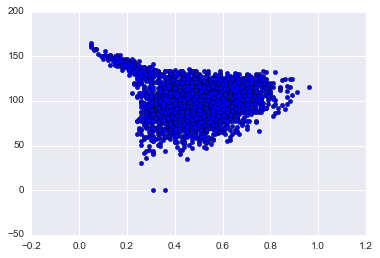

In [25]:
plt.scatter(data.mes_estim.values,data.day_calls.values)

### 6 вопрос

In [27]:
data[['mes_estim','day_calls']].corr(method='spearman')

,mes_estim,day_calls
mes_estim,1.00000,0.04335
day_calls,0.04335,1.00000


In [28]:
rxx_sp = 0.04335
n = data.shape[0]

In [29]:
st_sp = (rxx_sp * np.sqrt(n - 2)) / np.sqrt(1 - rxx_sp**2)
st_sp

2.5042914458268415

In [35]:
p_sp = 2 * (1 - stats.t.cdf(np.abs(st_sp),n-2))
p_sp

0.012317126915165622

### 8 вопрос

In [47]:
st_ch = pd.DataFrame(index = ['ch Flase','ch True'])
#st_ch.index = ['ch Flase','ch True']
for s in np.unique(states):
    st_ch[s] = [data_tr1[data_tr1.state == s].loc[data_tr1.churn == 'False.'].shape[0],
                data_tr1[data_tr1.state == s].loc[data_tr1.churn == 'True.'].shape[0]]

In [48]:
st_ch

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
ch Flase,19,25,11,17,10,17,25,18,16,18,...,20,11,14,18,20,18,16,22,27,20
ch True,1,5,5,2,5,5,5,1,1,2,...,3,1,6,4,3,5,7,2,5,2


In [49]:
st_ch_stat,p_val_st_ch,__,__ = stats.chi2_contingency(st_ch)

In [50]:
v_kramer = np.sqrt(st_ch_stat / (st_ch.sum().sum() * \
                               (min(st_ch.shape[0],st_ch.shape[1]) - 1.0)))

In [51]:
p_val_st_ch

0.70975900427784611

In [52]:
v_kramer

0.20039321502033319

In [56]:
def check_cells_for_chi2(table):
    __,__,__,expecte = stats.chi2_contingency(table)
    print expecte
    return np.sum(expecte < 5) / (table.shape[0]*table.shape[1]) > 0.2

In [57]:
check_cells_for_chi2(st_ch)

[[ 16.7183227   25.07748405  13.37465816  15.88240656  12.53874202
   18.39015497  25.07748405  15.88240656  14.21057429  16.7183227
   17.55423883  10.86690975  12.53874202  15.04649043  10.03099362
   19.2260711   20.89790337  20.89790337  12.53874202  20.06198724
   20.06198724  23.40565178  18.39015497  17.55423883  17.55423883
   20.06198724  21.73381951  15.88240656  20.06198724  20.06198724
   10.03099362  20.06198724  24.24156791  20.06198724  27.58523245
   20.06198724  10.86690975  17.55423883  15.04649043  18.39015497
   17.55423883  19.2260711   10.03099362  16.7183227   18.39015497
   19.2260711   19.2260711   19.2260711   20.06198724  26.74931632
   18.39015497]
 [  3.2816773    4.92251595   2.62534184   3.11759344   2.46125798
    3.60984503   4.92251595   3.11759344   2.78942571   3.2816773
    3.44576117   2.13309025   2.46125798   2.95350957   1.96900638
    3.7739289    4.10209663   4.10209663   2.46125798   3.93801276
    3.93801276   4.59434822   3.60984503   3.445

False